In [95]:
# Dependencies and Setup

import pandas as pd
import numpy as np
import os
import csv
import matplotlib.pyplot as plt

In [ ]:
#1 Read in 10 years of Occupation Statistics for Focus State - Texas
#last year reported is 2018, (2009 - 2018)
#Input Data from BLS (Buruer of Labor Statistics on Occupation Types, Employee Counts)\
#Read from csv file

#2  Combine all years data for analysis

years = np.arange(2009, 2019,1)
state_code = "TX"
years_df = pd.DataFrame()

for year in years:
    data_in = pd.read_csv(os.path.join("..","Resources", f"state_M{year}_dl.csv"))
  
    data_save = data_in.loc[(data_in["OCC_CODE"].str.contains("15-")) & (data_in["ST"] == state_code), 
                                      ["YEAR" , "AREA", "ST", "STATE", "OCC_CODE", 
                                       "OCC_TITLE", "OCC_GROUP", "TOT_EMP"]].reset_index(drop=True)
    data_save.loc[:, "YEAR"] = year
  
    years_df = years_df.append(data_save, ignore_index=True)
    

In [70]:
#3 Display Data for Cleaning

years_df.head(20)

,YEAR,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP
0,2009,48,TX,Texas,15-0000,Computer and mathematical science occupations,major,265030
1,2009,48,TX,Texas,15-1011,"Computer and information scientists, research",NaN,1480
2,2009,48,TX,Texas,15-1021,Computer programmers,NaN,31820
3,2009,48,TX,Texas,15-1031,"Computer software engineers, applications",NaN,34260
4,2009,48,TX,Texas,15-1032,"Computer software engineers, systems software",NaN,35250
5,2009,48,TX,Texas,15-1041,Computer support specialists,NaN,45600
6,2009,48,TX,Texas,15-1051,Computer systems analysts,NaN,45550
7,2009,48,TX,Texas,15-1061,Database administrators,NaN,9700
8,2009,48,TX,Texas,15-1071,Network and computer systems administrators,NaN,29090
9,2009,48,TX,Texas,15-1081,Network systems and data communications analysts,NaN,15440


In [72]:
#4 Clean Data for field Total Employee count field for use

#convert null data represented by "**' to zeros

years_df.loc[years_df["TOT_EMP"] == '**', "TOT_EMP"] = "0"

#convert Total column to integer
years_df['TOT_EMP'] = years_df['TOT_EMP'].str.replace(',', '').astype(int)

#clean data
years_df["OCC_TITLE"] = years_df["OCC_TITLE"].str.replace("Occupations", "", case = False) 
years_df["OCC_TITLE"] = years_df["OCC_TITLE"].str.replace("cccupations", "", case = False) 

In [78]:
#5 Display Data after Cleaning

years_df.head(20)

,YEAR,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP
0,2009,48,TX,Texas,15-0000,Computer and mathematical science,major,265030
1,2009,48,TX,Texas,15-1011,"Computer and information scientists, research",NaN,1480
2,2009,48,TX,Texas,15-1021,Computer programmers,NaN,31820
3,2009,48,TX,Texas,15-1031,"Computer software engineers, applications",NaN,34260
4,2009,48,TX,Texas,15-1032,"Computer software engineers, systems software",NaN,35250
5,2009,48,TX,Texas,15-1041,Computer support specialists,NaN,45600
6,2009,48,TX,Texas,15-1051,Computer systems analysts,NaN,45550
7,2009,48,TX,Texas,15-1061,Database administrators,NaN,9700
8,2009,48,TX,Texas,15-1071,Network and computer systems administrators,NaN,29090
9,2009,48,TX,Texas,15-1081,Network systems and data communications analysts,NaN,15440


In [80]:
#6 Output File (CSV)
years_path = os.path.join("..","Resources","input_years_df.csv")

#Save cities data fram to csv file
years_df.to_csv (years_path, index = None, header=True)


In [93]:
years_df.loc[years_df["YEAR"] == 2018]

years_df.loc[years_df["TOT_EMP"] == 2018]


,YEAR,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP
164,2018,48,TX,Texas,15-0000,Computer and Mathematical,major,364120
165,2018,48,TX,Texas,15-1111,Computer and Information Research Scientists,detailed,1830
166,2018,48,TX,Texas,15-1121,Computer Systems Analysts,detailed,51710
167,2018,48,TX,Texas,15-1122,Information Security Analysts,detailed,8520
168,2018,48,TX,Texas,15-1131,Computer Programmers,detailed,20960
169,2018,48,TX,Texas,15-1132,"Software Developers, Applications",detailed,71260
170,2018,48,TX,Texas,15-1133,"Software Developers, Systems Software",detailed,28720
171,2018,48,TX,Texas,15-1134,Web Developers,detailed,7830
172,2018,48,TX,Texas,15-1141,Database Administrators,detailed,11020
173,2018,48,TX,Texas,15-1142,Network and Computer Systems Administrators,detailed,35100


In [86]:
x_time = years
x_time

array([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

ValueError: x and y must have same first dimension, but have shapes (10,) and (7,)

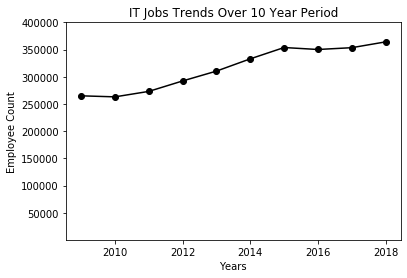

In [96]:
#Plot Major IT and Data Job Types


#x_axis is time
x_time = years
# # x_time

#y_axis are different drugs
y_major = years_df.loc[years_df["OCC_CODE"] == "15-0000", "TOT_EMP"]
y_webdev = years_df.loc[years_df["OCC_CODE"] == "15-1134", "TOT_EMP"]
y_appdev = years_df.loc[years_df["OCC_CODE"] == "15-1132", "TOT_EMP"]
y_companl = years_df.loc[years_df["OCC_CODE"].isin(["15-1051", "15-1121"]), "TOT_EMP"]
y_compsci = years_df.loc[years_df["OCC_CODE"].isin(["15-1011", "15-1111"]), "TOT_EMP"]

#plot parameters
#plt.xlim(-1.25, x_time.max()+2)
plt.ylim(500, 400000)

plt.xlabel("Years")
plt.ylabel("Employee Count")
plt.title("IT Jobs Trends Over 10 Year Period")

job1_handle, = plt.plot(x_time, y_major, marker="o", color="black", label="Computer Major Group")
job2_handle, = plt.plot(x_time, y_webdev, marker="o", color="blue", label="Web Dev")
job3_handle, = plt.plot(x_time, y_appdev, marker="o", color="green", label="Application Dev")
job4_handle, = plt.plot(x_time, y_companl, marker="o", color="red", label="Comp Analyst")
job5_handle, = plt.plot(x_time, y_compsci, marker="o", color="purple", label="Comp Scientist")


plt.legend(handles=[job1_handle, job2_handle, job_handle, job_handle], loc="best")
plt.grid(axis='y')

# Save the Figure
# plt.savefig("../output_charts/YearlyComparison.png", bbox_inches = "tight")